In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/bluebook-for-bulldozers/TrainAndValid.csv',low_memory=False)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
# We are only taking 40 thousand of the data
sample_df = df.sample(n=40000,
                     random_state=42)
sample_df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
148588,1521781,21000.0,1507963,4199,132,2.0,1988,NaN,NaN,4/21/2001 0:00,...,20 inch,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
246811,1758060,37000.0,1349729,16679,132,1.0,2005,7565.0,High,6/7/2010 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
196162,1634075,14000.0,1273985,4579,132,7.0,1999,NaN,NaN,10/18/2007 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
94981,1406718,37000.0,1411309,7054,132,1.0,1995,NaN,NaN,8/11/1998 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
359972,2467619,12000.0,1743723,20101,136,1.0,2006,1545.0,High,6/24/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356556,2434204,14000.0,1744691,17319,136,1.0,2004,0.0,NaN,5/27/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
411194,6304722,47500.0,1232218,248,149,1.0,2003,NaN,NaN,2/13/2012 0:00,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
297239,2232199,37500.0,534644,1596,136,1.0,2002,0.0,NaN,5/24/2007 0:00,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,VPAT,None or Unspecified,NaN,NaN
163203,1585564,32000.0,1460747,4607,132,1.0,2005,NaN,NaN,8/20/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
len(sample_df)

40000

<Axes: ylabel='Frequency'>

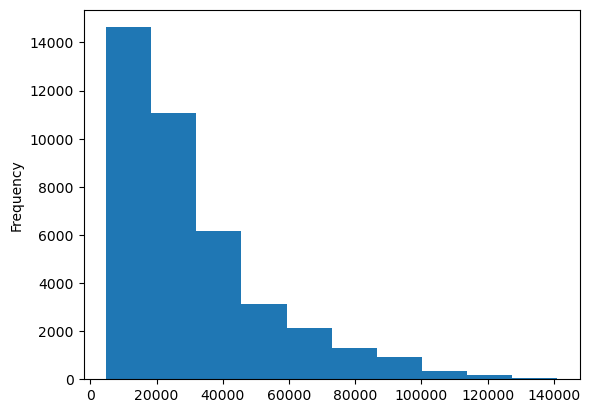

In [6]:
sample_df.SalePrice.plot(kind='hist')

In [7]:
sample = sample_df.to_csv('data/bluebook-for-bulldozers/sample_df.csv',index= False)

In [8]:
# Parsing the date column
data = pd.read_csv('data/bluebook-for-bulldozers/sample_df.csv',
                  low_memory = False,
                  parse_dates = ['saledate'])

In [9]:
data.head().T

,0,1,2,3,4
SalesID,1521781,1758060,1634075,1406718,2467619
SalePrice,21000.0,37000.0,14000.0,37000.0,12000.0
MachineID,1507963,1349729,1273985,1411309,1743723
ModelID,4199,16679,4579,7054,20101
datasource,132,132,132,132,136
auctioneerID,2.0,1.0,7.0,1.0,1.0
YearMade,1988,2005,1999,1995,2006
MachineHoursCurrentMeter,NaN,7565.0,NaN,NaN,1545.0
UsageBand,NaN,High,NaN,NaN,High
saledate,2001-04-21 00:00:00,2010-06-07 00:00:00,2007-10-18 00:00:00,1998-08-11 00:00:00,2009-06-24 00:00:00


In [10]:
# Sorting the data according to saledate
df.sort_values(by=['saledate'], inplace = True, ascending = True)
df.saledate.head(18)

405675     1/1/2012 0:00
268962    1/10/2003 0:00
221519    1/10/2003 0:00
283617    1/10/2003 0:00
122970    1/10/2003 0:00
121285    1/10/2003 0:00
237812    1/10/2003 0:00
10704     1/10/2005 0:00
51910     1/10/2008 0:00
11464     1/10/2008 0:00
11463     1/10/2008 0:00
5103      1/10/2008 0:00
175249    1/10/2008 0:00
9689      1/10/2008 0:00
536       1/10/2008 0:00
7279      1/10/2008 0:00
191798    1/10/2008 0:00
174911    1/10/2008 0:00
Name: saledate, dtype: object

In [11]:
# Make a copy of dataframe
data_tmp = data.copy
data_tmp

<bound method NDFrame.copy of        SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  \
0      1521781    21000.0    1507963     4199         132           2.0   
1      1758060    37000.0    1349729    16679         132           1.0   
2      1634075    14000.0    1273985     4579         132           7.0   
3      1406718    37000.0    1411309     7054         132           1.0   
4      2467619    12000.0    1743723    20101         136           1.0   
...        ...        ...        ...      ...         ...           ...   
39995  2434204    14000.0    1744691    17319         136           1.0   
39996  6304722    47500.0    1232218      248         149           1.0   
39997  2232199    37500.0     534644     1596         136           1.0   
39998  1585564    32000.0    1460747     4607         132           1.0   
39999  6262087    60000.0     215003     3879         149           1.0   

       YearMade  MachineHoursCurrentMeter UsageBand   saledate  ...  

In [12]:
print(data.iloc[78]['saledate'].month)

3


In [13]:
# Lets create some labels according to saledate
data['saleyear'] = data.saledate.dt.year
data['salemonth'] = data.saledate.dt.month
data['saleday'] = data.saledate.dt.day
data['saledayofweek'] = data.saledate.dt.dayofweek
data['saledayofyear'] = data.saledate.dt.dayofyear

In [14]:
data.head().T

,0,1,2,3,4
SalesID,1521781,1758060,1634075,1406718,2467619
SalePrice,21000.0,37000.0,14000.0,37000.0,12000.0
MachineID,1507963,1349729,1273985,1411309,1743723
ModelID,4199,16679,4579,7054,20101
datasource,132,132,132,132,136
auctioneerID,2.0,1.0,7.0,1.0,1.0
YearMade,1988,2005,1999,1995,2006
MachineHoursCurrentMeter,NaN,7565.0,NaN,NaN,1545.0
UsageBand,NaN,High,NaN,NaN,High
saledate,2001-04-21 00:00:00,2010-06-07 00:00:00,2007-10-18 00:00:00,1998-08-11 00:00:00,2009-06-24 00:00:00


In [15]:
# Now lets drop saledate label
data.drop('saledate',
         axis=1,
         inplace = True)
data.head().T

,0,1,2,3,4
SalesID,1521781,1758060,1634075,1406718,2467619
SalePrice,21000.0,37000.0,14000.0,37000.0,12000.0
MachineID,1507963,1349729,1273985,1411309,1743723
ModelID,4199,16679,4579,7054,20101
datasource,132,132,132,132,136
auctioneerID,2.0,1.0,7.0,1.0,1.0
YearMade,1988,2005,1999,1995,2006
MachineHoursCurrentMeter,NaN,7565.0,NaN,NaN,1545.0
UsageBand,NaN,High,NaN,NaN,High
fiModelDesc,E110B,WA250-5,210LE,311,TL130


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalesID                   40000 non-null  int64  
 1   SalePrice                 40000 non-null  float64
 2   MachineID                 40000 non-null  int64  
 3   ModelID                   40000 non-null  int64  
 4   datasource                40000 non-null  int64  
 5   auctioneerID              38045 non-null  float64
 6   YearMade                  40000 non-null  int64  
 7   MachineHoursCurrentMeter  14263 non-null  float64
 8   UsageBand                 7077 non-null   object 
 9   fiModelDesc               40000 non-null  object 
 10  fiBaseModel               40000 non-null  object 
 11  fiSecondaryDesc           26281 non-null  object 
 12  fiModelSeries             5776 non-null   object 
 13  fiModelDescriptor         7337 non-null   object 
 14  Produc

In [17]:
# Lets convert objects to categories
for label , content in data.items():
    if content.dtype == 'object':
        print(label)


UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [18]:
# First we have to fill the missing of numerical values
for label, content in data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            data[label+'_is_misssing'] = pd.isnull(content)
            data[label] = content.fillna(content.median())

In [19]:
# Lets check weather everything is filled
for label,content in data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [20]:
# Now lets change all objects to numbers
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [21]:
for column in data.columns:
    if not pd.api.types.is_numeric_dtype(data[column]):
        data[column] = label_encoder.fit_transform(data[column])

In [22]:
data.isna().sum()

SalesID                                 0
SalePrice                               0
MachineID                               0
ModelID                                 0
datasource                              0
auctioneerID                            0
YearMade                                0
MachineHoursCurrentMeter                0
UsageBand                               0
fiModelDesc                             0
fiBaseModel                             0
fiSecondaryDesc                         0
fiModelSeries                           0
fiModelDescriptor                       0
ProductSize                             0
fiProductClassDesc                      0
state                                   0
ProductGroup                            0
ProductGroupDesc                        0
Drive_System                            0
Enclosure                               0
Forks                                   0
Pad_Type                                0
Ride_Control                      

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 59 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SalesID                               40000 non-null  int64  
 1   SalePrice                             40000 non-null  float64
 2   MachineID                             40000 non-null  int64  
 3   ModelID                               40000 non-null  int64  
 4   datasource                            40000 non-null  int64  
 5   auctioneerID                          40000 non-null  float64
 6   YearMade                              40000 non-null  int64  
 7   MachineHoursCurrentMeter              40000 non-null  float64
 8   UsageBand                             40000 non-null  int64  
 9   fiModelDesc                           40000 non-null  int64  
 10  fiBaseModel                           40000 non-null  int64  
 11  fiSecondaryDesc

In [24]:
data.columns.isnull().sum()

0

In [25]:
%%time
# Train the model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)
# Fit the model
x = data.drop('SalePrice',axis=1)
y = data['SalePrice']

model.fit(x,y)

CPU times: user 2min 38s, sys: 1.46 s, total: 2min 40s
Wall time: 46.2 s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [26]:
model.score(x,y)

0.9799251011402157

In [27]:
# model.score() gives the coefficient of determination
# It gives 0 if the model predicts the mean of the saleprice column
# It pridicts negative if model performs terribily

In [28]:
data.saleyear

0        2001
1        2010
2        2007
3        1998
4        2009
         ... 
39995    2009
39996    2012
39997    2007
39998    2009
39999    2012
Name: saleyear, Length: 40000, dtype: int32

In [29]:
# now lets sort the data according to saleyear and then split the valid set
data.sort_values(by='saleyear', ascending=True,inplace=True)

In [30]:
# Now see everything is sorted by the sale year
data.saleyear

2423     1989
35819    1989
10665    1989
20741    1989
9105     1989
         ... 
4283     2012
29549    2012
29546    2012
4103     2012
39999    2012
Name: saleyear, Length: 40000, dtype: int32

In [34]:
data.saleyear.value_counts()

saleyear
2009    4343
2008    3776
2011    3432
2007    3187
2010    3150
2006    2079
2005    2010
2004    1962
2001    1689
2002    1685
2000    1648
2003    1505
1998    1274
1999    1222
2012    1099
1997     965
1996     870
1995     835
1994     696
1993     620
1992     532
1990     479
1991     473
1989     469
Name: count, dtype: int64

In [38]:
# In the descirption of the data it is told that the validation set is from 2012 so lets split the data according to the saleyear
data_valid = data[data.saleyear >= 2012]
data_valid.saleyear

39851    2012
39023    2012
39057    2012
39010    2012
39993    2012
         ... 
4283     2012
29549    2012
29546    2012
4103     2012
39999    2012
Name: saleyear, Length: 1099, dtype: int32

In [45]:
for saleyear in data_valid['saleyear']:
    if   saleyear < 2012:
        print(saleyear)

In [46]:
# See there are none and lets create the train set
data_train = data[data.saleyear <2012]
data_train.saleyear

2423     1989
35819    1989
10665    1989
20741    1989
9105     1989
         ... 
36477    2011
27653    2011
28779    2011
5427     2011
25244    2011
Name: saleyear, Length: 38901, dtype: int32

In [49]:
len(data_valid), len(data_train)

(1099, 38901)

In [60]:
# Split the data
x_train,y_train = data_train.drop('SalePrice',axis=1),data_train.SalePrice
x_valid,y_valid = data_valid.drop('SalePrice',axis = 1) , data_valid.SalePrice
# Lets check wheather everything is okay
x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((38901, 58), (38901,), (1099, 58), (1099,))

# The evaluation metrics for competition is Root Mean Squared Log Error
## So lets create an evaluation function 
/home/t3n/Pictures/Screenshot at 2023-09-10 21-30-10.png -This screenshot tells about the metrics

In [94]:
# When we look at the sklearn documentation we can see that there is mean_squareda_log_error
# now we only need to make the root of it.
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score

def RMSLE(y_test,y_preds):
    '''
    This functions returns the root mean squared log error of y_test and y_preds
    '''
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

# Always remember that if the valid score is higher than training score it means that the model is overfitting which should be avoided



# Lets create a function which evaluates a model at different levels
def show_scores(model):
    '''
    Evaluates model at different levels
    '''
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_valid)
    scores = {'Training MAE': mean_absolute_error(y_train,train_preds),
              'Valid MAE' : mean_absolute_error(y_valid,val_preds),
              'Training RMSLE':RMSLE(y_train,train_preds),
              'Valid RMSLE' : RMSLE(y_valid,val_preds),
              'Training r^2' : r2_score(y_train,train_preds),
              'valid r^2':r2_score(y_valid,val_preds)
             }
    return scores

In [63]:
from sklearn.ensemble import RandomForestRegressor


## Change max samples value

In [78]:
%%time
model = RandomForestRegressor(n_jobs = -1,
                             random_state = 42,
                              max_samples = 10000
                             )
model.fit(x_train,y_train)

CPU times: user 51.8 s, sys: 568 ms, total: 52.4 s
Wall time: 15.3 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [79]:
show_scores(model)

{'Training MAE': 4568.702309195136,
 'Valid MAE': 7918.774631483167,
 'Training RMSLE': 0.21708763871437517,
 'Valid RMSLE': 0.30911901995318364,
 'Training r^2': 0.9042660597239589,
 'valid r^2': 0.7899583347797264}

### Hyperparameter tuning using RandomizedSearchCV

In [91]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Lets pass some RandomForestRegressor hyperparameters
rf_grid = {'n_estimators':np.arange(10,100,10),
          'max_depth':[None,3,5,10],
          'min_samples_split':np.arange(2,20,2),
          'min_samples_leaf': np.arange(1,20,2),
          'max_features':[0.5,1,'sqrt','auto'],
          'max_samples':[10000]}

# Now instantiate it to the model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs = -1,
                                                   random_state=42),
                                                   param_distributions=rf_grid,
                                                   cv=2,
                                                   n_iter=2,
                                                   verbose=True)

# Fit the model
rs_model.fit(x_train,y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
CPU times: user 22.6 s, sys: 900 ms, total: 23.5 s
Wall time: 22.8 s


RandomizedSearchCV(cv=2,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

# Actually we should use more number of n_iters and cv, we are using less because we have less time

In [92]:
rs_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 8,
 'min_samples_leaf': 7,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 10}

In [96]:
# Now evaluate our RandomizedSearchCV
show_scores(model)

{'Training MAE': 4568.702309195136,
 'Valid MAE': 7918.774631483167,
 'Training RMSLE': 0.21708763871437517,
 'Valid RMSLE': 0.30911901995318364,
 'Training r^2': 0.9042660597239589,
 'valid r^2': 0.7899583347797264}

In [99]:
%%time
# These are the most ideal hyperparameters which was obtained by 2 hrs of fitting on mac book pro
ideal_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples=None,
                                   random_state=42)

# Fit the model
ideal_model.fit(x_train,y_train)

CPU times: user 31.9 s, sys: 597 ms, total: 32.5 s
Wall time: 14.3 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [100]:
show_scores(model)

{'Training MAE': 4568.702309195136,
 'Valid MAE': 7918.774631483167,
 'Training RMSLE': 0.21708763871437517,
 'Valid RMSLE': 0.30911901995318364,
 'Training r^2': 0.9042660597239589,
 'valid r^2': 0.7899583347797264}

# Test on Test.csv

In [101]:
# Import the test data
data_test = pd.read_csv('data/bluebook-for-bulldozers/Test.csv',
                       low_memory=False,
                       parse_dates=['saledate'])
data_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [102]:
# The test dataset does not have SalePrice column

#### Preprocessing the data (making the test dataset similat to the train dataset)

In [104]:
# We are going to do everything what we did on our training dataset

def process_data(df):
    '''
    Preprocess the data
    '''
    # Lets create some labels according to saledate
    df['saleyear'] = df.saledate.dt.year
    df['salemonth'] = df.saledate.dt.month
    df['saleday'] = df.saledate.dt.day
    df['saledayofweek'] = df.saledate.dt.dayofweek
    df['saledayofyear'] = df.saledate.dt.dayofyear
    
    
    df.drop('saledate', axis=1, inplace = True)
    
    
       # we have to fill the missing of numerical values with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+'_is_misssing'] = pd.isnull(content)
                df[label] = content.fillna(content.median())
    
    # Filling objects with numbers
    for column in df.columns:
        if not pd.api.types.is_numeric_dtype(df[column]):
            df[column] = label_encoder.fit_transform(df[column])
    
    
    
    
    
    
    return df

In [107]:
# Preprocess the data
df_test = process_data(data_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear,salemonth,saleday,saledayofweek,saledayofyear,MachineHoursCurrentMeter_is_misssing
0,1227829,1006309,3168,121,3,1999,3688.0,1,498,179,...,8,6,3,3,2012,5,3,3,124,False
1,1227844,1022817,7271,121,3,1000,28555.0,0,830,291,...,8,6,2,1,2012,5,10,3,131,False
2,1227847,1031560,22805,121,3,2004,6038.0,2,1176,403,...,8,6,3,3,2012,5,10,3,131,False
3,1227848,56204,1269,121,3,2006,8940.0,0,286,112,...,8,6,3,3,2012,5,10,3,131,False
4,1227863,1053887,22312,121,3,2005,2286.0,1,565,195,...,3,4,3,3,2012,5,10,3,131,False


In [108]:
x_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Travel_Controls,Differential_Type,Steering_Controls,saleyear,salemonth,saleday,saledayofweek,saledayofyear,auctioneerID_is_misssing,MachineHoursCurrentMeter_is_misssing
2423,1615792,1320553,8308,132,1.0,1978,0.0,3,933,322,...,7,3,4,1989,9,28,3,271,False,True
35819,1647195,1124842,8442,132,4.0,1978,0.0,3,424,163,...,7,3,4,1989,2,1,2,32,False,True
10665,1340214,247720,3406,132,24.0,1986,0.0,3,198,84,...,7,3,4,1989,7,20,3,201,False,True
20741,1419108,1231858,7261,132,6.0,1973,0.0,3,1102,391,...,7,2,1,1989,8,17,3,229,False,True
9105,1599701,1527768,24488,132,4.0,1983,0.0,3,540,208,...,5,3,4,1989,2,1,2,32,False,True


In [109]:
# We can see that the number of columns are differ in x_train and df_test
# So we are going to pass them through a set. Set does not allows duplicates so the odd one will pass through
set(x_train.columns) - set(df_test.columns)

{'auctioneerID_is_misssing'}

In [110]:
# See the missing column in df_test
# Manually adjust df to have an auctioneer id missing column
df_test['auctioneerID_is_misssing'] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Travel_Controls,Differential_Type,Steering_Controls,saleyear,salemonth,saleday,saledayofweek,saledayofyear,MachineHoursCurrentMeter_is_misssing,auctioneerID_is_misssing
0,1227829,1006309,3168,121,3,1999,3688.0,1,498,179,...,6,3,3,2012,5,3,3,124,False,False
1,1227844,1022817,7271,121,3,1000,28555.0,0,830,291,...,6,2,1,2012,5,10,3,131,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,2,1176,403,...,6,3,3,2012,5,10,3,131,False,False
3,1227848,56204,1269,121,3,2006,8940.0,0,286,112,...,6,3,3,2012,5,10,3,131,False,False
4,1227863,1053887,22312,121,3,2005,2286.0,1,565,195,...,4,3,3,2012,5,10,3,131,False,False


In [111]:
# Now both have same number of columns in both datasets
# So lets predict
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


## Here we ran into a problem which cannot be resolved easily
Feature names must be in the same order as they were in fit.

## How to upload it to kaggle
It is described in the competetion that we should make a dataframe with only 'salesID' and 'SalePrice' in the dataframe as columns

# Feature importance
* ideal_model.feature_importance_
* also do some research on the topic
* make a plot to learn feature importance easier